<a href="https://colab.research.google.com/github/Sulivan10/les-bases-de-la-data-science/blob/main/notebooks/P2C6_TP_cours_effectuees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Réalisez une ACP - Les données des cours

# 1 Preliminary

## 1.1 Context

Ce TP est en lien avec l'activité [Réalisez une ACP](https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees/5345201-tp-realisez-une-acp), de la partie 2 du cours  [Réalisez une analyse exploratoire de données](https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees).

Nous allons travailler sur le *jeu de données des cours suivis*.

Prenez le temps de bien **lire**, **comprendre** et **tester** le code ci dessous.

<br>

------------------------------

<br>

En cas de question, n'hésitez pas à nous adresser vos remarques ou suggestions via ce [lien](https://openclassrooms.zendesk.com/hc/fr/requests/new).

<br>

-------------------------

<br>

* version : 0.0.3
* last update:  2023-04-19

<br>

## 1.2 Imports

Nous allons importer nos librairies :

In [91]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns

## 1.3 Graphics and Options

On 'charge' `seaborn` :

In [92]:
sns.set()

## 1.4 Data

Nous allons maintenant charger les données. Pour ce faire vous pouvez les retrouver sur cette [page du cours](https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees/5148885-telechargez-les-jeux-de-donnees-analyses-dans-ce-cours).

<br>

------------------------


<br>


Si vous utlisez Google Colab et que vous ne savez pas comment importer un fichier .csv, voici une [vidéo](https://youtu.be/6HFlwqK3oeo?t=171) à regarder à partir de 2:53

<br>

-------------------------------------

<br>


Importons notre fichier. Faisons attentions aux options comme `decimal` ou `index_col` :

In [93]:
df = pd.read_csv("my_courses.csv", decimal=".", index_col=0)
df.head()

,inscription,progression,moyenneDeClasse,duree,difficulte,nbChapitres,ratioQuizEvaluation,nbEvaluations,derniereMiseAJour,idCours
titreCours,,,,,,,,,,
Classez_et_segmentez_des_données_visuelles,29,34,NaN,15.0,3,11,0.666667,3,22,4470531
Initiez-vous_à_la_statistique_inférentielle,55,4,86.0,12.0,2,21,0.750000,4,8,4525306
Maîtrisez_les_bases_des_probabilités,60,100,NaN,NaN,1,1,NaN,0,89,4525296
Découvrez_les_librairies_Python_pour_la_Data_Science,64,64,96.0,10.0,2,8,0.000000,2,57,4452741
Devenez_mentor_sur_OpenClassrooms,76,100,91.0,6.0,1,12,1.000000,3,29,3595541


# 2 Data Preparation

Avant de nous jeter dans le grand bain, nous allons devoir étudier et préparer un peu le terrain.

## 2.1 Quick tour

Tout d'abord, faisons un rapide tour de nos données. Commençons par les afficher :

In [94]:
df.head()

,inscription,progression,moyenneDeClasse,duree,difficulte,nbChapitres,ratioQuizEvaluation,nbEvaluations,derniereMiseAJour,idCours
titreCours,,,,,,,,,,
Classez_et_segmentez_des_données_visuelles,29,34,NaN,15.0,3,11,0.666667,3,22,4470531
Initiez-vous_à_la_statistique_inférentielle,55,4,86.0,12.0,2,21,0.750000,4,8,4525306
Maîtrisez_les_bases_des_probabilités,60,100,NaN,NaN,1,1,NaN,0,89,4525296
Découvrez_les_librairies_Python_pour_la_Data_Science,64,64,96.0,10.0,2,8,0.000000,2,57,4452741
Devenez_mentor_sur_OpenClassrooms,76,100,91.0,6.0,1,12,1.000000,3,29,3595541


In [95]:
df.tail()

,inscription,progression,moyenneDeClasse,duree,difficulte,nbChapitres,ratioQuizEvaluation,nbEvaluations,derniereMiseAJour,idCours
titreCours,,,,,,,,,,
Apprenez_à_programmer_en_Python,349,4,84.0,40.0,3,38,0.500000,4,151,235344
Réalisez_des_calculs_distribués_sur_des_données_massives,377,34,85.0,20.0,2,15,0.500000,4,91,4297166
Évaluez_et_améliorez_les_performances_d'un_modèle_de_machine_learning,412,58,90.0,10.0,2,8,0.333333,3,18,4297211
Créez_un_cours_sur_OpenClassrooms,439,100,NaN,1.0,1,10,NaN,0,148,2067781
Développez_votre_site_web_avec_le_framework_Symfony,713,2,90.0,30.0,2,27,0.714286,7,64,3619856


Quelle est la dimension de notre dataframe?

In [96]:
df.shape

(19, 10)

La méthode `info` nous donne des indications globales :

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, Classez_et_segmentez_des_données_visuelles to Développez_votre_site_web_avec_le_framework_Symfony
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   inscription          19 non-null     int64  
 1   progression          19 non-null     int64  
 2   moyenneDeClasse      15 non-null     float64
 3   duree                18 non-null     float64
 4   difficulte           19 non-null     int64  
 5   nbChapitres          19 non-null     int64  
 6   ratioQuizEvaluation  16 non-null     float64
 7   nbEvaluations        19 non-null     int64  
 8   derniereMiseAJour    19 non-null     int64  
 9   idCours              19 non-null     int64  
dtypes: float64(3), int64(7)
memory usage: 1.6+ KB


Quel est le % de valeurs manquantes par colonne ?

In [98]:
df.isna().mean()

,0
inscription,0.000000
progression,0.000000
moyenneDeClasse,0.210526
duree,0.052632
difficulte,0.000000
nbChapitres,0.000000
ratioQuizEvaluation,0.157895
nbEvaluations,0.000000
derniereMiseAJour,0.000000
idCours,0.000000


Y a-t-il des lignes en double ?

In [99]:
df.duplicated().sum()

np.int64(0)

Combien y a-t-il de valeurs différentes par colonne ?

In [100]:
df.nunique()

,0
inscription,17
progression,13
moyenneDeClasse,11
duree,10
difficulte,3
nbChapitres,18
ratioQuizEvaluation,7
nbEvaluations,5
derniereMiseAJour,17
idCours,19


Enfin la methode `describe` nous donne une idée de la dispersion globale de nos données :

In [101]:
df.describe()

,inscription,progression,moyenneDeClasse,duree,difficulte,nbChapitres,ratioQuizEvaluation,nbEvaluations,derniereMiseAJour,idCours
count,19.000000,19.000000,15.000000,18.000000,19.000000,19.000000,16.000000,19.000000,19.000000,1.900000e+01
mean,235.473684,44.052632,89.400000,15.000000,1.894737,15.210526,0.617560,2.947368,78.578947,3.967983e+06
std,167.684349,36.326412,3.996427,10.318459,0.657836,9.223032,0.246053,1.715086,63.453671,1.075638e+06
min,29.000000,2.000000,84.000000,1.000000,1.000000,1.000000,0.000000,0.000000,8.000000,2.353440e+05
25%,134.000000,4.000000,85.500000,8.500000,1.500000,8.500000,0.500000,2.000000,22.000000,4.056556e+06
50%,195.000000,44.000000,90.000000,13.500000,2.000000,13.000000,0.666667,3.000000,61.000000,4.421146e+06
75%,310.500000,70.000000,92.000000,20.000000,2.000000,20.500000,0.750000,4.000000,146.500000,4.469006e+06
max,713.000000,100.000000,96.000000,40.000000,3.000000,38.000000,1.000000,7.000000,186.000000,4.525306e+06


## 2.2 Data selection

Nous avons une idée *globale* de nos données. Faisons maintenant un peu de *sélection*. On rappelle que notre dataframe a pour dimension :

In [102]:
df.shape

(19, 10)

Nous allons sélectionner d'abord que certaines colones :

In [103]:
cols = ["inscription","progression","moyenneDeClasse","duree","difficulte","nbChapitres","ratioQuizEvaluation","nbEvaluations"]

In [104]:
df.columns

Index(['inscription', 'progression', 'moyenneDeClasse', 'duree', 'difficulte',
       'nbChapitres', 'ratioQuizEvaluation', 'nbEvaluations',
       'derniereMiseAJour', 'idCours'],
      dtype='object')

In [105]:
df = df[cols]

Notre dataframe a maintenant une dimension de :

In [106]:
df.shape

(19, 8)

## 2.3 Cleaning

Traitons les valeurs manquantes. On rappelle que :

In [107]:
df.isna().mean()

,0
inscription,0.000000
progression,0.000000
moyenneDeClasse,0.210526
duree,0.052632
difficulte,0.000000
nbChapitres,0.000000
ratioQuizEvaluation,0.157895
nbEvaluations,0.000000


Nous allons remplacer les valeurs manquantes par la valeur moyenne de chaque colonne.

<br>

-------------------------------

<br>


-- **ATTENTION** --

Cela n'est peut-etre pas la méthode la plus **solide** ou la plus **sérieuse**. En effet, le traitement des valeurs manquantes peut être un sujet **sensible** et **délicat**. Cela requiert une attention toute particulière!

Dans notre cas, nous pouvons simplement imputer les valeurs manquantes par la moyenne. Cela n'est pas la meilleure chose à faire, mais c'est la plus **rapide**!


<br>

___________________________________


<br>


In [108]:
df = df.fillna(df.mean())
df.isna().mean()

,0
inscription,0.0
progression,0.0
moyenneDeClasse,0.0
duree,0.0
difficulte,0.0
nbChapitres,0.0
ratioQuizEvaluation,0.0
nbEvaluations,0.0


## 2.4 Data Split

Nous allons ensuite séparer nos données. D'un coté `X` la matrice des données :

In [109]:
X = df.values
X[:5]

array([[ 29.        ,  34.        ,  89.4       ,  15.        ,
          3.        ,  11.        ,   0.66666667,   3.        ],
       [ 55.        ,   4.        ,  86.        ,  12.        ,
          2.        ,  21.        ,   0.75      ,   4.        ],
       [ 60.        , 100.        ,  89.4       ,  15.        ,
          1.        ,   1.        ,   0.61755952,   0.        ],
       [ 64.        ,  64.        ,  96.        ,  10.        ,
          2.        ,   8.        ,   0.        ,   2.        ],
       [ 76.        , 100.        ,  91.        ,   6.        ,
          1.        ,  12.        ,   1.        ,   3.        ]])

C'est bien un `np.array` :

In [110]:
type(X)

numpy.ndarray

La forme de cette matrice est conforme à nos attentes :

In [111]:
X.shape

(19, 8)

Nous enregistrons les noms de nos cours dans une variable `names` :

In [112]:
names = df.index
names

Index(['Classez_et_segmentez_des_données_visuelles',
       'Initiez-vous_à_la_statistique_inférentielle',
       'Maîtrisez_les_bases_des_probabilités',
       'Découvrez_les_librairies_Python_pour_la_Data_Science',
       'Devenez_mentor_sur_OpenClassrooms',
       'Initiez-vous_à_l'algèbre_relationnelle_avec_le_langage_SQL',
       'Maintenez-vous_à_jour_en_développement',
       'Entraînez_un_modèle_prédictif_linéaire',
       'Explorez_vos_données_avec_des_algorithmes_non_supervisés',
       'Décrivez_et_nettoyez_votre_jeu_de_données', 'Créez_votre_Data_Lake',
       'Développez_une_application_iPhone_avec_le_modèle_MVC',
       'Animez_un_atelier_de_créativité',
       'Faites_une_base_de_données_avec_UML',
       'Apprenez_à_programmer_en_Python',
       'Réalisez_des_calculs_distribués_sur_des_données_massives',
       'Évaluez_et_améliorez_les_performances_d'un_modèle_de_machine_learning',
       'Créez_un_cours_sur_OpenClassrooms',
       'Développez_votre_site_web_avec_le_fr

et nos colonnes, nos features, dans une variable `features` :

In [113]:
features = df.columns
features

Index(['inscription', 'progression', 'moyenneDeClasse', 'duree', 'difficulte',
       'nbChapitres', 'ratioQuizEvaluation', 'nbEvaluations'],
      dtype='object')

# 3 About PCA

Nous pouvons - *enfin* - commencer notre ACP, ou notre PCA !

## 3.1 Scaling

Commençons par scaler les données. On instancie :

In [114]:
scaler = StandardScaler()

On fit :

In [115]:
scaler.fit(X)

StandardScaler()

On transforme :

In [116]:
X_scaled = scaler.transform(X)
X_scaled[:5]

array([[-1.26506467e+00, -2.84313717e-01,  4.14248649e-15,
         0.00000000e+00,  1.72618937e+00, -4.69032782e-01,
         2.24619768e-01,  3.15283331e-02],
       [-1.10576261e+00, -1.13278921e+00, -9.91105344e-01,
        -3.07368082e-01,  1.64398987e-01,  6.44920075e-01,
         6.05792707e-01,  6.30566661e-01],
       [-1.07512761e+00,  1.58233236e+00,  4.14248649e-15,
         0.00000000e+00, -1.39739139e+00, -1.58298564e+00,
         0.00000000e+00, -1.76558665e+00],
       [-1.05061960e+00,  5.64161774e-01,  1.92391037e+00,
        -5.12280137e-01,  1.64398987e-01, -8.03218639e-01,
        -2.82476374e+00, -5.67509995e-01],
       [-9.77095574e-01,  1.58233236e+00,  4.66402515e-01,
        -9.22104247e-01, -1.39739139e+00, -3.57637496e-01,
         1.74931152e+00,  3.15283331e-02]])

Rappelons qu'on peut faire les 2 opérations en une seule :

In [117]:
X_scaled = scaler.fit_transform(X)

On espère avoir une moyenne à 0 et un écart type à 1 :

In [118]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7
mean,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00
std,1.03,1.03,1.03,1.03,1.03,1.03,1.03,1.03


## 3.2 PCA

Nous allons travailler que sur les 6 premières composantes :

In [119]:
n_components = 6

On instancie notre ACP :

In [120]:
pca = PCA(n_components=n_components)

On l'entraine sur les données scalées :

In [121]:
pca.fit(X_scaled)

PCA(n_components=6)

## 3.3 Explained variance & scree plot

Intéressons nous maintenant à la variance *captée* par chaque nouvelle composante. Grace à `scikit-learn` on peut utiliser l'attribut `explained_variance_ratio_` :

In [122]:
pca.explained_variance_ratio_

array([0.4715944 , 0.15651041, 0.13676841, 0.11908719, 0.04148031,
       0.03042718])

Ici la 1ère composante *capte* 47% de la variance de nos données initiales, la 2ème 16% etc etc.

Enregistrons cela dans une variable :

In [123]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([47.16, 15.65, 13.68, 11.91,  4.15,  3.04])

Les 2 premières composantes *captent* donc `47+16 = 63%` de la variance, les 3 premières `47+16+13 = 76%` de la variance etc etc.

Dans le jargon, cela s'appelle une *somme cumulée*. Et pour faire une somme cumulée `numpy` dispose de la fonction `cumsum` :

In [124]:
scree_cum = scree.cumsum().round()
scree_cum

array([47., 63., 76., 88., 93., 96.])

Définisons ensuite une variable avec la liste de nos composantes :

In [125]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

On peut enfin l'afficher de façon graphique :

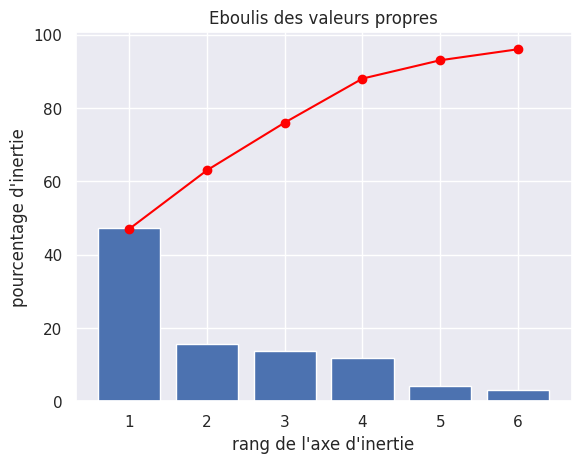

In [126]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.

On voit ici que près de 80% de la variance est comprise dans les 3 premières composantes, et près de 90% dans les 4 premières.

## 3.4 Components

Intéressons nous maintenant à nos fameuses composantes. Nous avons dit dans le cours que c'est bien par un calcul que l'on obtient ces composantes.

La formule de ce calcul nous est donnée par l'attribut `components_`. Cette variable est généralement nommée `pcs` :

In [127]:
pcs = pca.components_
pcs

array([[ 0.23229081, -0.45303568, -0.08449592,  0.44865413,  0.33114918,
         0.4643896 ,  0.08103545,  0.4477559 ],
       [-0.1385512 ,  0.09570881, -0.50590131,  0.11946397,  0.56702258,
        -0.14819996, -0.55994188, -0.21076734],
       [-0.2329107 , -0.18131195,  0.74959103,  0.02578145,  0.09797129,
         0.00162489, -0.57772613,  0.08341881],
       [ 0.84456256,  0.17345083, -0.00374152, -0.00379675, -0.2511345 ,
        -0.03195603, -0.43707483,  0.0384231 ],
       [-0.1019438 ,  0.10374663,  0.04280049,  0.7043421 , -0.33049795,
         0.25476797, -0.03959608, -0.552459  ],
       [-0.24178329, -0.28083669, -0.34571373, -0.38205031, -0.44706348,
         0.52232025, -0.35266466,  0.01160229]])

Affichons la même chose mais version `pandas` :

In [128]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7
0,0.232291,-0.453036,-0.084496,0.448654,0.331149,0.464390,0.081035,0.447756
1,-0.138551,0.095709,-0.505901,0.119464,0.567023,-0.148200,-0.559942,-0.210767
2,-0.232911,-0.181312,0.749591,0.025781,0.097971,0.001625,-0.577726,0.083419
3,0.844563,0.173451,-0.003742,-0.003797,-0.251135,-0.031956,-0.437075,0.038423
4,-0.101944,0.103747,0.042800,0.704342,-0.330498,0.254768,-0.039596,-0.552459
5,-0.241783,-0.280837,-0.345714,-0.382050,-0.447063,0.522320,-0.352665,0.011602


Intéressant... Mais pas encore très clair...
Continuons le travail :

In [129]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,inscription,progression,moyenneDeClasse,duree,difficulte,nbChapitres,ratioQuizEvaluation,nbEvaluations
F1,0.23,-0.45,-0.08,0.45,0.33,0.46,0.08,0.45
F2,-0.14,0.10,-0.51,0.12,0.57,-0.15,-0.56,-0.21
F3,-0.23,-0.18,0.75,0.03,0.10,0.00,-0.58,0.08
F4,0.84,0.17,-0.00,-0.00,-0.25,-0.03,-0.44,0.04
F5,-0.10,0.10,0.04,0.70,-0.33,0.25,-0.04,-0.55
F6,-0.24,-0.28,-0.35,-0.38,-0.45,0.52,-0.35,0.01


De mieux en mieux !  

-- **ATTENTION** -- : Nous avons arrondi les résultats pour simplifier l'analyse :)

<br>

-------------------------

<br>

Alors, comment calcule t-on la première composante `F1` ?

et bien c'est assez simple :

`F1 = (0.23 * inscription) + (-0.45 * progression) + ... + (0.45 * nbEvaluations)`

et F2 ?

`F2 = (0.14 * inscription) + (-0.10 * progression) + ... + (0.21 * nbEvaluations)`

**Eureka !**

<br>

------------------------

<br>



Dans certains cas, on voudra afficher ce dataframe comme cela :

In [130]:
pcs.T

,F1,F2,F3,F4,F5,F6
inscription,0.232291,-0.138551,-0.232911,0.844563,-0.101944,-0.241783
progression,-0.453036,0.095709,-0.181312,0.173451,0.103747,-0.280837
moyenneDeClasse,-0.084496,-0.505901,0.749591,-0.003742,0.042800,-0.345714
duree,0.448654,0.119464,0.025781,-0.003797,0.704342,-0.382050
difficulte,0.331149,0.567023,0.097971,-0.251135,-0.330498,-0.447063
nbChapitres,0.464390,-0.148200,0.001625,-0.031956,0.254768,0.522320
ratioQuizEvaluation,0.081035,-0.559942,-0.577726,-0.437075,-0.039596,-0.352665
nbEvaluations,0.447756,-0.210767,0.083419,0.038423,-0.552459,0.011602


Et pour une représentation plus *visuelle*, comme cela :

<Axes: >

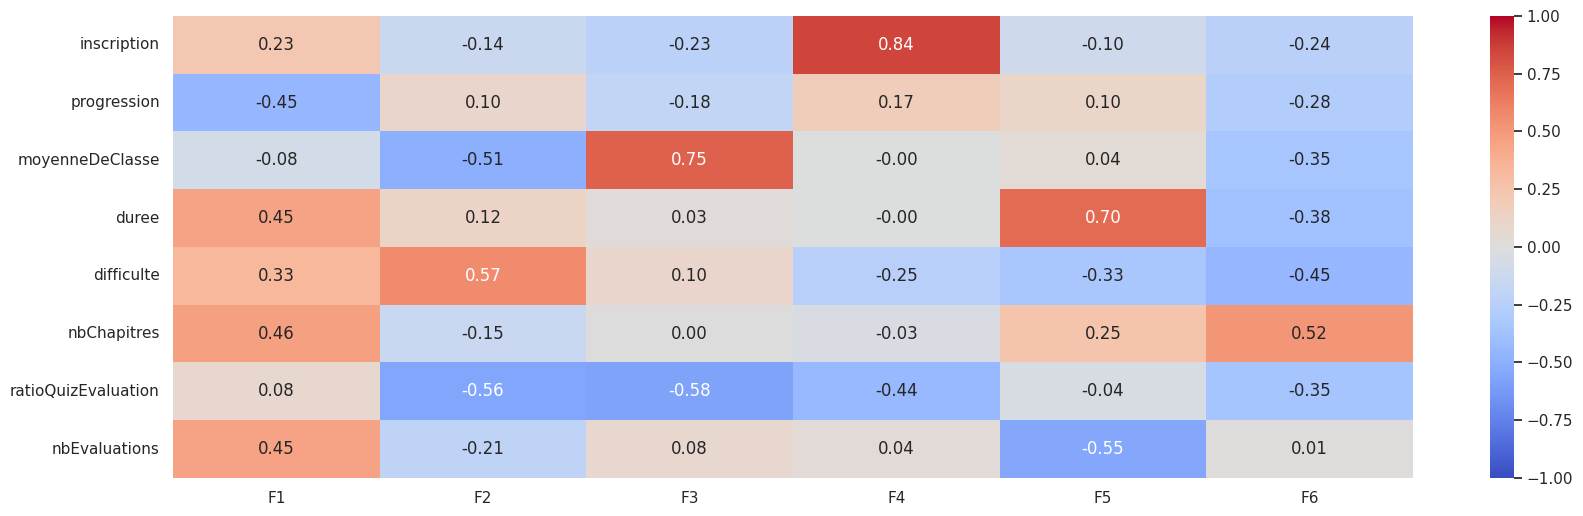

In [131]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

## 3.5 Correlation graph

Bon, pour le graphe des corrélations, on va tricher un peu...

Je vais vous donner du code clé en main. Charge à vous de le comprendre ou de le copier sans vergogne :)


Même si vous ne comprenez pas tout, essayez de lire au moins une fois le code, à la volée. On ne sait jamais...

<br>

_______________________________

<br>


Définissons nos axes x et y. Nous allons utiliser les 2 premières composantes. Comme - en code - on commence à compter à partir de 0, cela nous donne :

In [132]:
x, y = 0,1

Pour la partie graphique :

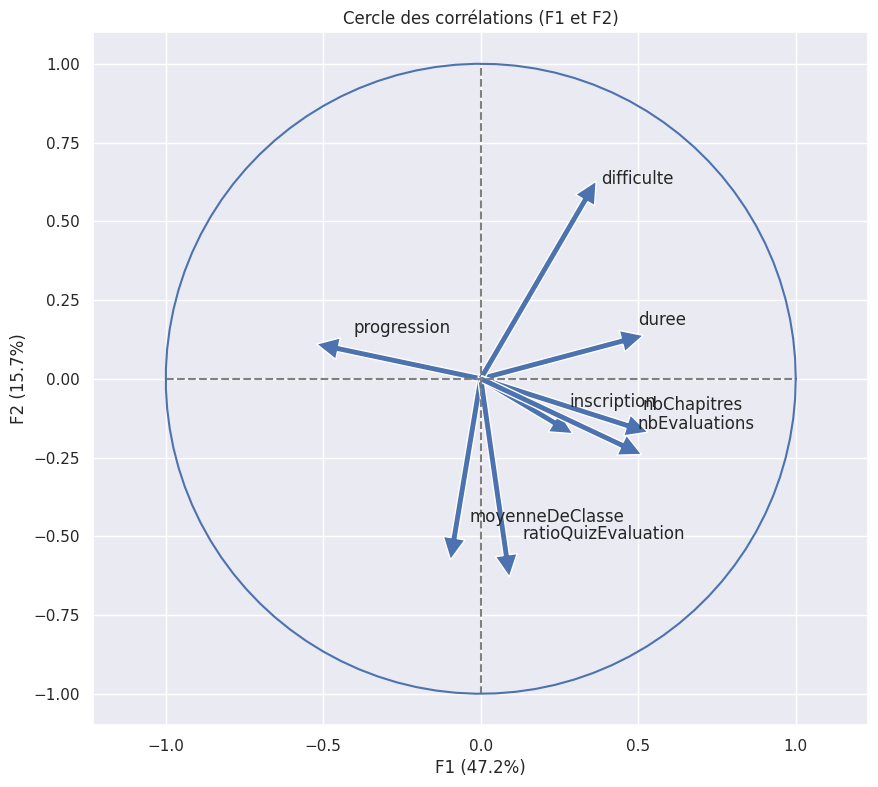

In [133]:
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07,
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])

# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

On peut en faire une fonction :

In [134]:
def correlation_graph(pca,
                      x_y,
                      features) :
    """Affiche le graphe des correlations

    Positional arguments :
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante :
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0,
                pca.components_[x, i],
                pca.components_[y, i],
                head_width=0.07,
                head_length=0.07,
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])

    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

Essayons cette fonction pour F1 et F2

-- **ATTENTION** -- Encore une fois Pour F1 et F2 il faut bien préciser  0 et 1  😀

In [135]:
x_y = (0,1)
x_y

(0, 1)

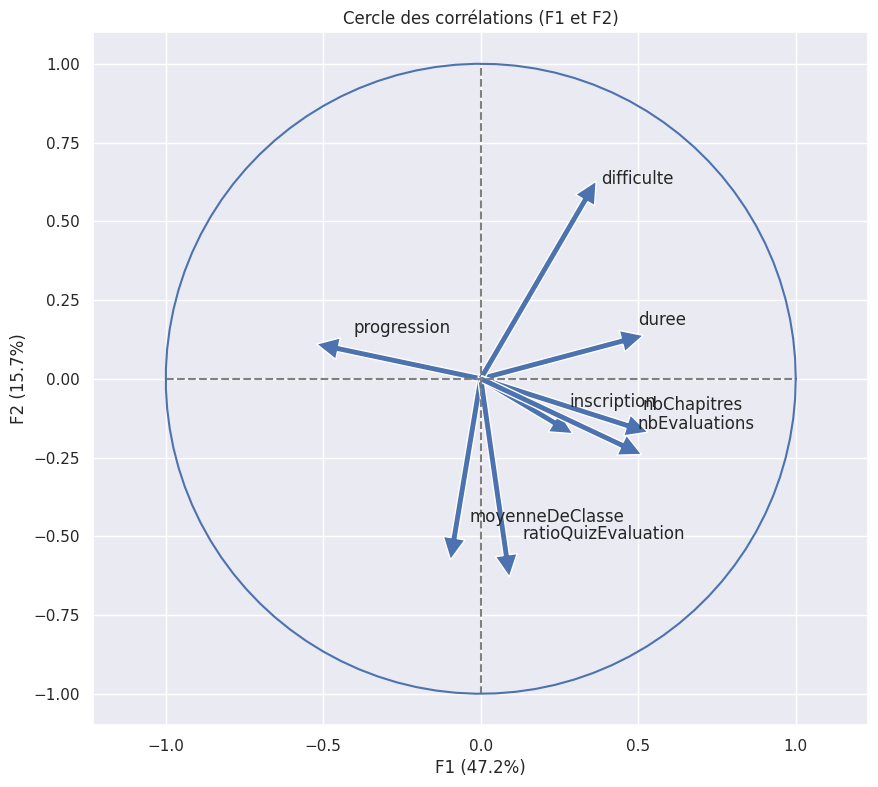

In [136]:
correlation_graph(pca, x_y, features)

Essayons pour F3 et F4 :

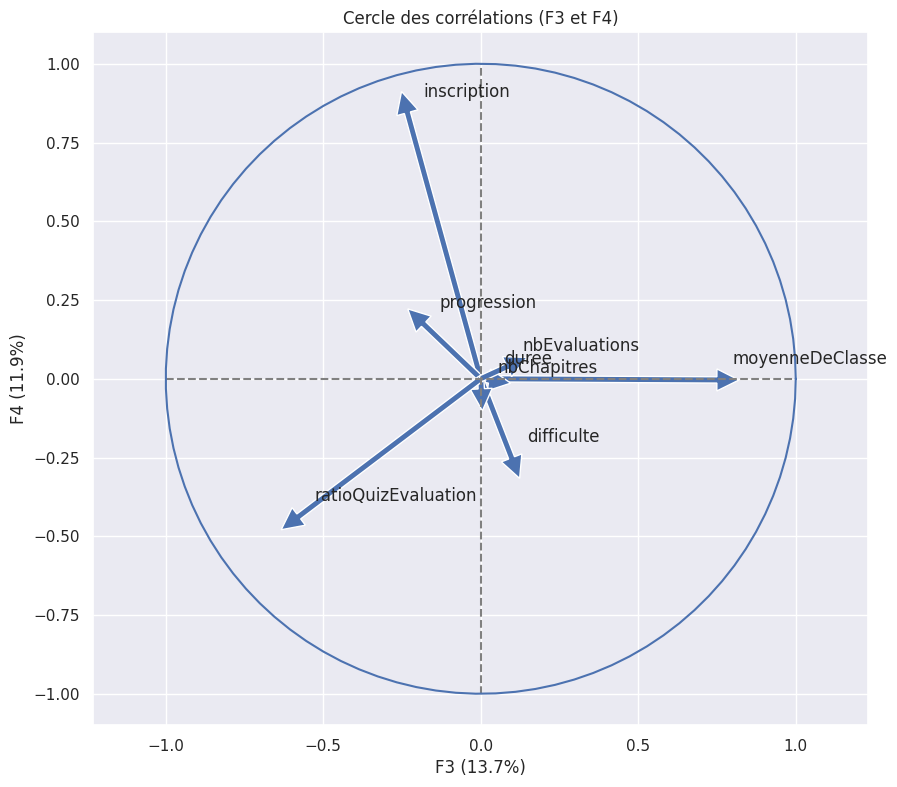

In [137]:
correlation_graph(pca, (2,3), features)

## 3.6 Projection

Travaillons maintenant sur la projection de nos dimensions. Tout d'abord calculons les coordonnées de nos individus dans le nouvel espace :

In [138]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[ 0.22107277,  1.06394473,  0.3874128 , -1.63322222, -0.61683984,
        -0.70983399],
       [ 0.88754323,  0.03499815, -0.56814276, -1.42793746, -0.52608729,
         1.10258485],
       [-2.95501419,  0.11477732, -0.3232466 , -0.29987584,  1.30771945,
        -0.40701673],
       [-1.69361161,  1.07862307,  3.17074995,  0.40249607,  0.05356553,
         0.12275527],
       [-1.86989322, -1.7847995 , -0.87896007, -0.9500123 , -0.08170767,
        -0.19571633]])

Rappelons que :

In [139]:
x_y

(0, 1)

Accrochez vous, car voici la fonction.


Pour info, sachez que nous reviendrons dessus lors du TP de la 3e partie. Pas besoin de trop rentrer dans le détail pour l'instant, mais lisez la quand même le code, au moins une fois, en diagonale...

In [140]:
def display_factorial_planes(   X_projected,
                                x_y,
                                pca=None,
                                labels = None,
                                clusters=None,
                                alpha=1,
                                figsize=[10,8],
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments :
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments :
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8]
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize:
        figsize = (7,6)

    # On gère les labels
    if  labels is None :
        labels = []
    try :
        len(labels)
    except Exception as e :
        raise e

    # On vérifie la variable axis
    if not len(x_y) ==2 :
        raise AttributeError("2 axes sont demandées")
    if max(x_y )>= X_.shape[1] :
        raise AttributeError("la variable axis n'est pas bonne")

    # on définit x et y
    x, y = x_y

    # Initialisation de la figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters

    # Les points
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha,
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe
    if pca :
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else :
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) :
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center')

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()



Essayons la version *simple* avec F1 et F2, les couleurs correspondent au niveau de difficulté :

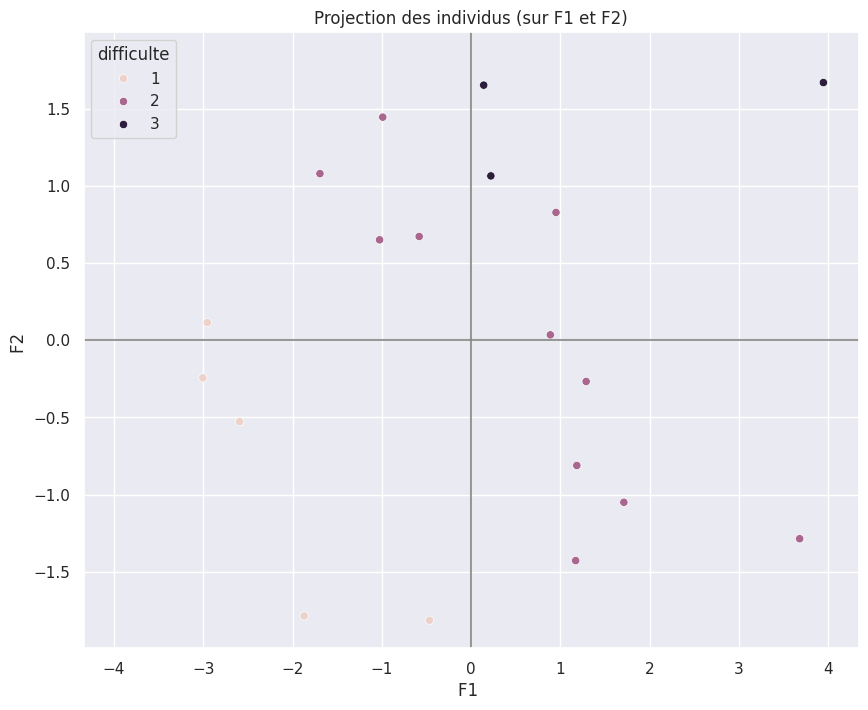

In [141]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, clusters=df['difficulte'])

Intéressant, mais il manque quelques éléments...

Essayons la version plus *élaborée* avec F1 et F2 :

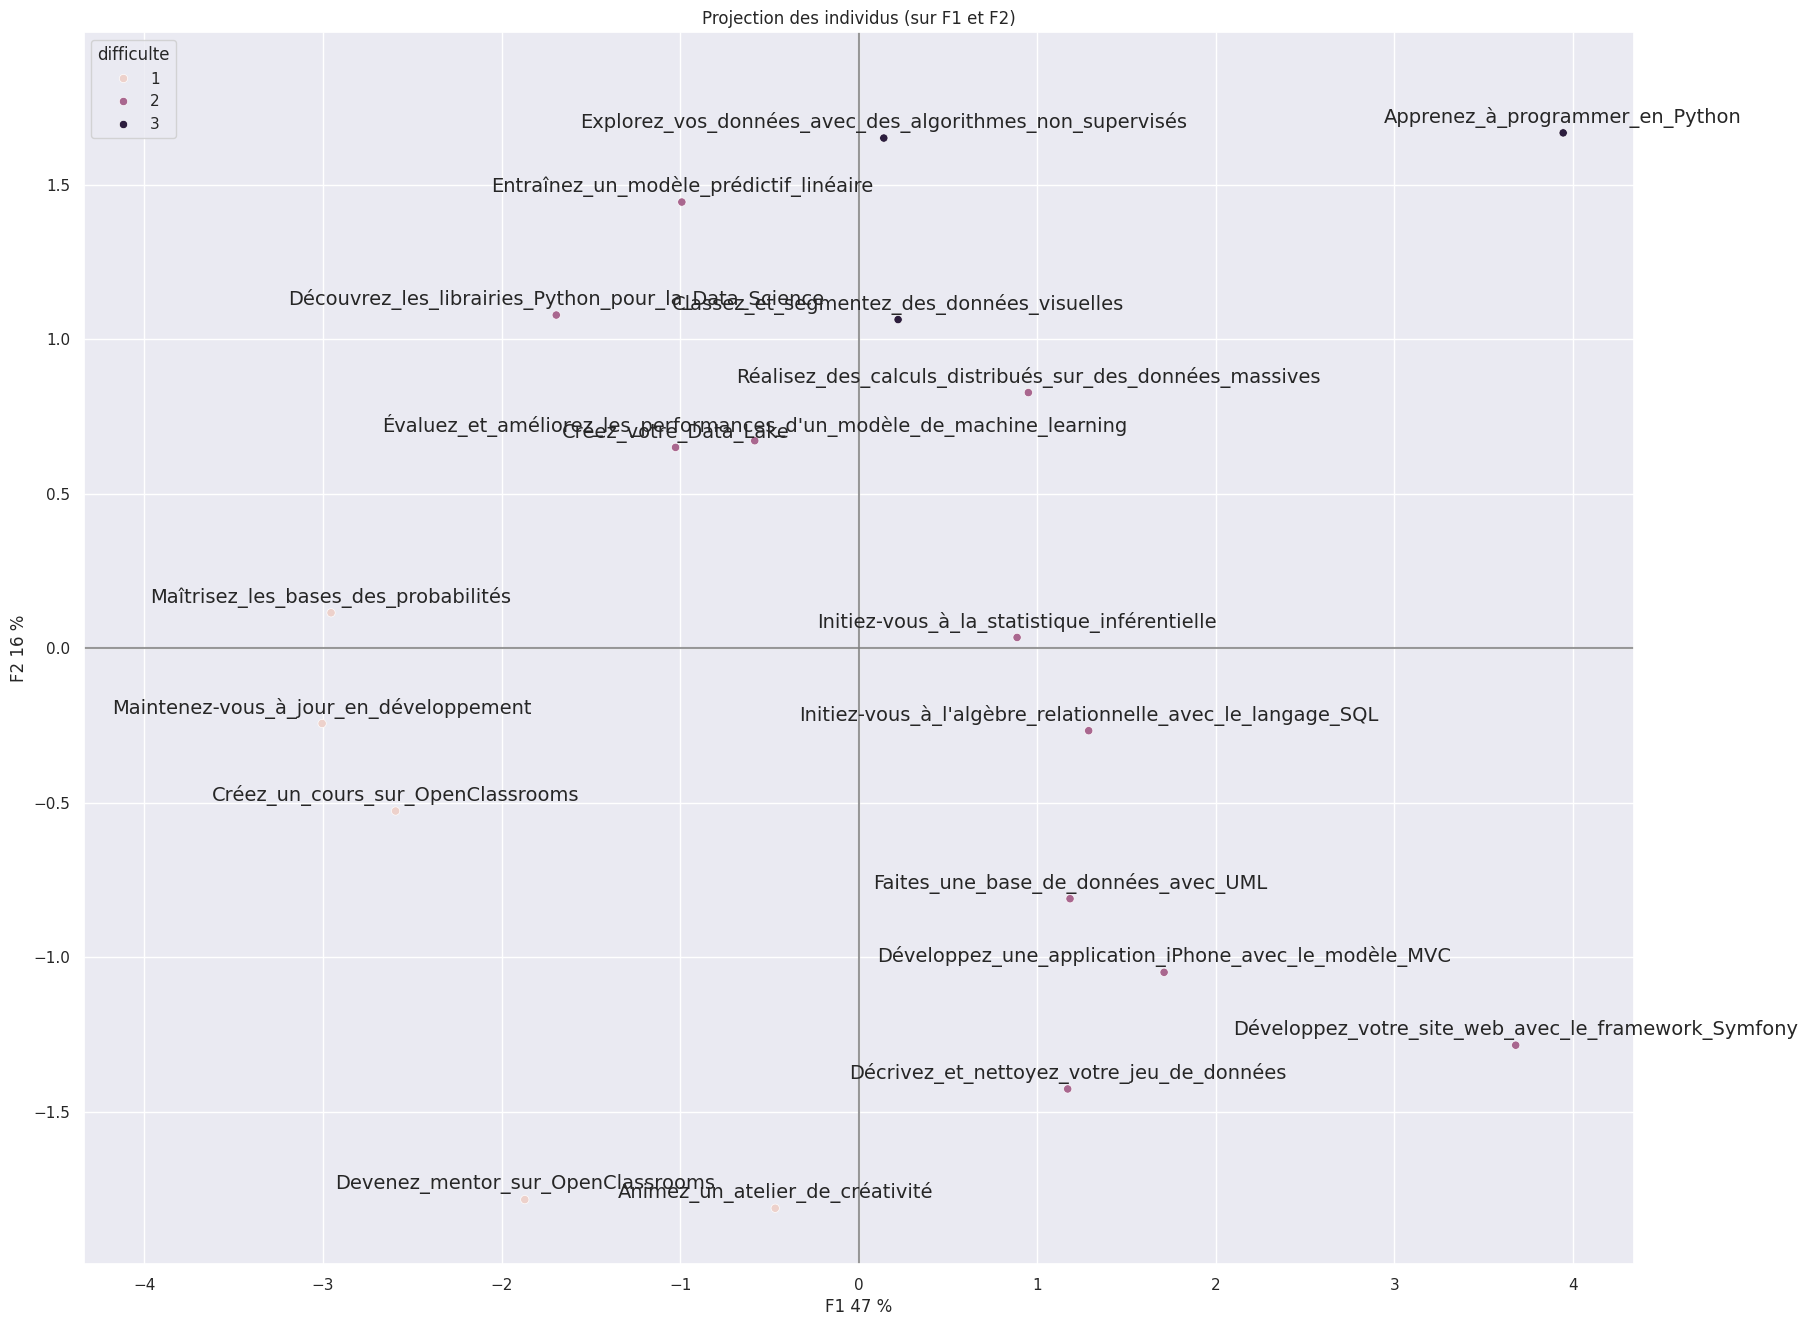

In [142]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), clusters=df['difficulte'], marker="o")

Beaucoup mieux !

Essayons avec F2 et F3 :

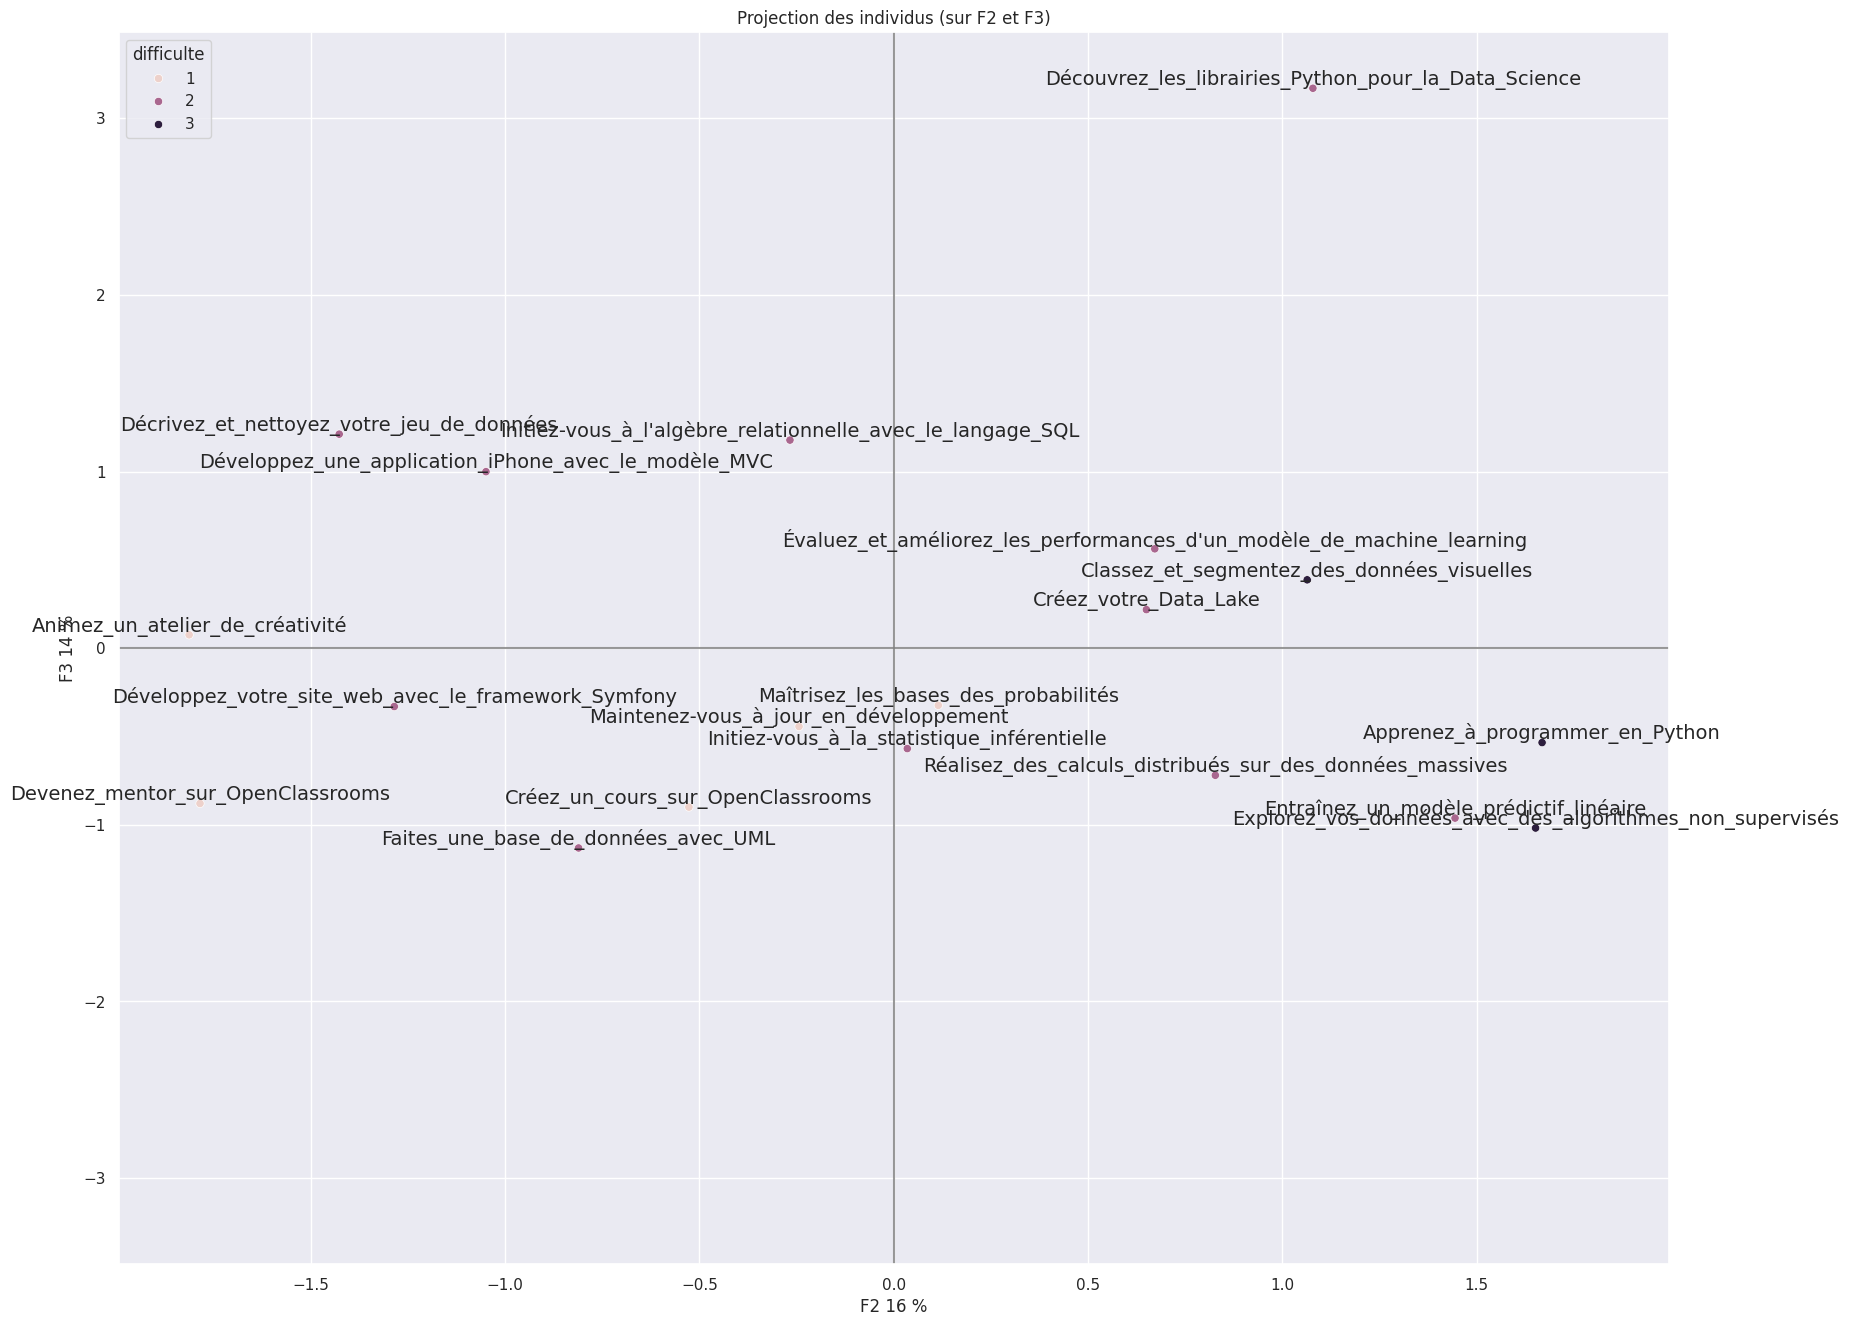

In [143]:
x_y = 1,2
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), clusters=df['difficulte'],marker="o")

# 4 Conclusion

Vous êtes arrivé au bout de ce travail, Bravo!

Il ne reste plus qu'à vous entrainer sur d'autres jeux de données 😀.

<br>

------------------

<br>

En cas de questions, n'hésitez pas à nous adresser vos questions, remarques ou suggestions sur le [formulaire](https://openclassrooms.zendesk.com/hc/fr/requests/new) .

